In [ ]:
# stock price prediction using RNN

0 0.18329252
100 0.0016462421
200 0.0014284062
300 0.0012670282
400 0.0011490077
500 0.0010594884
600 0.0009916159
700 0.00093973015
800 0.00089948525
900 0.00086786895


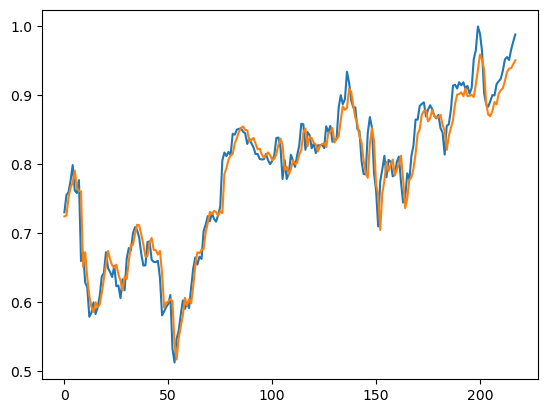

In [23]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

timesteps = seq_length = 7
data_dim = 5
hidden_dim = 5
output_dim = 1

xy = np.loadtxt("stock_data.csv", delimiter=",")
xy = xy[::-1]
scaler = MinMaxScaler()
xy = scaler.fit_transform(xy)
x = xy
y = xy[:, [-1]]

dataX = []
dataY = []
for i in range(0, len(y)-7):
    _x = x[i:i+seq_length]
    _y = y[i+seq_length]

    dataX.append(_x)
    dataY.append(_y)
    
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])
                
cell = tf.keras.layers.LSTMCell(hidden_dim)
lstm_layer = tf.keras.layers.RNN(cell, return_sequences=True)
dense_layer = tf.keras.layers.Dense(output_dim)
        
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

for i in range(1000):
    with tf.GradientTape() as tape:
        outputs = lstm_layer(trainX, training=True)
        Y_pred = dense_layer(outputs[:, -1])
        loss = tf.reduce_mean(tf.square(Y_pred-trainY))

    gradients = tape.gradient(loss, lstm_layer.trainable_variables + dense_layer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, lstm_layer.trainable_variables + dense_layer.trainable_variables))

    if i % 100 == 0:
        print(i, loss.numpy())

test_outputs = lstm_layer(testX)
test_pred = dense_layer(test_outputs[:, -1])

import matplotlib.pyplot as plt
plt.plot(testY)
plt.plot(test_pred)
plt.show()

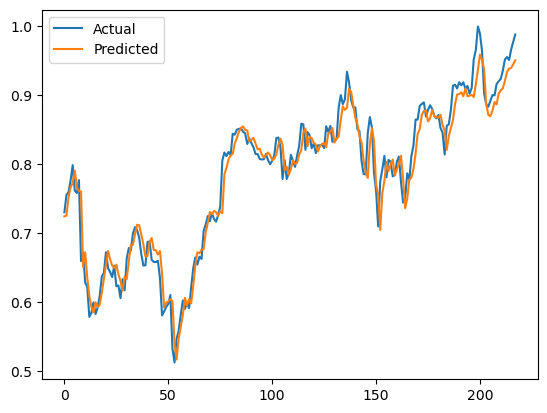

In [24]:
import matplotlib.pyplot as plt
plt.plot(testY, label="Actual")
plt.plot(test_pred, label="Predicted")
plt.legend()
plt.show()